# Multi-View Geometry 

## Problem 1 (Frobenius norm)
### Compute Frobenius norm of $n\times n$ matrix $xx^\top$ assuming that (Euclidean) norm $\|x\| = \sqrt{x^\top x}$ of vector $x\in R^n$ is given. That is, express $\|xx^\top\|_F$ in terms of $\|x\|$. The answer should not depend on $n$. Comment: this "random math" excerise is only meant to encourage you to look up the definition of Frobenius norm; the proof is only a couple of lines of simple algebra. 

Solution:

Note
$$\begin{align*}||xx^\top||_F =& \sqrt{\sum_{i=1}^n\sum_{j=1}^n |(xx^\top)_{i,j}|^2} \\ =& \sqrt{\sum_{i=1}^n\sum_{j=1}^n |x_i x_j|^2} \\ =& \sqrt{\sum_{i=1}^n\sum_{j=1}^n |x_i|^2 |x_j|^2} \\ =& \sqrt{\sum_{i=1}^n |x_i|^2 ||x||^2} \\ =& \sqrt{||x||^2 \sum_{i=1}^n |x_i|^2} \\=& \sqrt{||x||^2||x||^2} \\ =& ||x||^2 \end{align*}$$

## Problem 2
### Assuming a $calibrated$ camera (that is, $K=I$) and its two views corresponding to projection matrices $P_1=[I|0]$ and $P_2=[R|T]$ w.r.t. some world coordinate system, show formulas for coordinates of the following 3D points (in the same world coordinate system):

#### (a) optical center for the first view: $C_1= \begin{bmatrix} 0\\0\\0 \end{bmatrix}$ 
#### (b) image center for the first view: $Q_1= \begin{bmatrix} 0\\ 0 \\ 1 \end{bmatrix}$ 
#### (c) optical center for the second view: $C_2= R^{-1}\Bigg(\begin{bmatrix} 0\\ 0 \\ 0 \end{bmatrix} - T\Bigg) = -R^{-1}T$ 
#### (d) image center for the second view: $Q_2=R^{-1}\Bigg(\begin{bmatrix} 0\\ 0 \\ 1 \end{bmatrix} - T\Bigg)$ 

## Problem 3
### Using the same set up as in problem 2, show formulas for normalized coordinates of the following image points:

#### (a) epipole in the first camera image: $e_1= P_1 C_2 = [I|0] \begin{bmatrix} -R^{-1}T \\ 1\end{bmatrix}=-R^{-1}T$
#### (b) epipole in the second camera image: $e_2= P_2 C_1 = [R|T] \begin{bmatrix} 0\\ 0 \\ 0 \\ 1 \end{bmatrix} = T$

## Problem 4 (homogeneous and non-homogeneous line representations)
###  Lines in 2D images can be represented "homogeneously" as 3-vectors $l=[l_1,l_2,l_3]^T$ that give equation $l^T x=0$ for homogeneous points $x=[x_1,x_2,x_3]^T \;\in {\cal P}^2$ forming a line. Given $l$, what are the values of scalar parameters $a$, $b$ in the line equation $v=au+b$ for the same 2D points based on their regular (nonhomogeneous) representation $(u,v)=(\frac{x_1}{x_3},\frac{x_2}{x_3})$ in ${\cal R}^2$? 

$$v=au+b \implies \frac{x_2}{x_3} = a \frac{x_1}{x_3} + b \implies \frac{x_2}{x_3} - a \frac{x_1}{x_3} - b = 0 \implies - a \frac{x_1}{x_3} + \frac{x_2}{x_3} - b = 0$$

$$\begin{align*} l^\top x =& 0 \\ l_1 x_1 + l_2 x_2 + l_3 x_3 =& 0 \\ \frac{l_1 x_1}{l_2 x_3} + \frac{l_2 x_2}{l_2 x_3} + \frac{l_3 x_3}{l_2 x_3} =& \frac{0}{l_2 x_3} \\ \frac{l_1}{l_2} \cdot \frac{x_1}{x_3} + \frac{x_2}{x_3} + \frac{l_3}{l_2} =& 0\end{align*}$$

#### $a=-\frac{l_1}{l_2}$
#### $b=-\frac{l_3}{l_2}$

## Problem 5 (epipolar lines in normalized and non-normalized images)
### Given a matrix of intrinsic camera parameters $K$ and essential matrix $E$ between two views (A) and (B) such that $x_A^T E x_B=0$ for any corresponding points, write expressions for the following: 

#### (a) given homogeneous normalized point $x^{n}_B$ in image B, specify 3-vector $l_A^n$ describing the corresponding epipolar line of normalized points in image A:
####   $l_A^n=E x_B^n$
#### (b) given homogeneous normalized point $x^{n}_A$ in image A, specify 3-vector $l_B^n$ describing the corresponding epipolar line of normalized points in image B:
####   $l_B^n= E^\top x_A^n$
#### (c) assuming line (3-vector) $l^n$ of normalized image points, what is a 3-vector representation $l$ for the line formed by the corresponding points on the real (unnormalized) camera image:
#### $l=K^{-\top} l^n$


## Problem 6 (least squares for triangulation)
### Describe your approach to triangulating two matched feature points $x_a=[u_a,v_a,1]^T$ and $x_b=[u_b,v_b,1]^T$ in two views with given projection matrices $P_a$ and $P_b$. You should find 3D point $X=[X_1,X_2,X_3,1]^T$ and two scalars $w_a,w_b$ such that $P_a X\approx w_a x_a$ and $P_b X\approx w_b x_b$.  Be specific as you will need this for your programming part below. Use notation $M[i]$ to denote the $i$-th row vector of matrix $M$.
### You should use the first approach described for homograpy estimation in topic 6. In particular, you can formulate the problem as $AX\approx 0$, define elements of $4\times 4$ matrix $A$, convert the problem to an overdetermined system of 4 linear equations $A_{1:3}[X_1,X_2,X_3]^T \approx - A_{4}$, and specify its solution minimizing the sum of squared errors.
### Can you characterize geometrically the case when your solution satisfies $A_{1:3}[X_1,X_2,X_3]^T = - A_{4}$ exactly?

Solution:
Let $P_a^{(i)}$ represent the $i^{th}$ row of $P_a$ for $i=1, 2, 3$. Assuming for simplicity that $w_a = 1, w_b = 1$, we have that 
$$\begin{align*} 
P_a X &= x_a \\
\begin{bmatrix} P_a^{(1)} X \\ P_a^{(2)} X \\ P_a^{(3)} X \end{bmatrix} &= \begin{bmatrix} u_a \\ v_a \\ 1 \end{bmatrix}\\
\begin{bmatrix} P_a^{(1)} X \\ P_a^{(2)} X \\ P_a^{(3)} X \end{bmatrix} \times \begin{bmatrix} u_a \\ v_a \\ 1 \end{bmatrix} &= \begin{bmatrix} u_a \\ v_a \\ 1 \end{bmatrix} \times \begin{bmatrix} u_a \\ v_a \\ 1 \end{bmatrix}\\
\begin{bmatrix} P_a^{(2)} X - P_a^{(3)} X v_a \\ P_a^{(3)} X u_a - P_a^{(1)} X \\ P_a^{(1)} X v_a - P_a^{(2)}X u_a \end{bmatrix}  &= 0\\
\begin{bmatrix} (P_a^{(2)} - P_a^{(3)} v_a)X \\ (P_a^{(3)} u_a - P_a^{(1)})X \\ (P_a^{(1)} v_a - P_a^{(2)}u_a)X \end{bmatrix}  &= 0\\
\end{align*}$$

This gives us the following system of equations:
$\begin{cases} (P_a^{(2)} - P_a^{(3)} v_a)X = 0 \\ (P_a^{(3)} u_a - P_a^{(1)})X = 0 \\ (P_a^{(1)} v_a - P_a^{(2)}u_a)X = 0\end{cases}$

Notice that 
$$-u_a (P_a^{(2)} - P_a^{(3)} v_a)X - v_a (P_a^{(3)} u_a - P_a^{(1)})X = -u_a \cdot 0 - v_a \cdot 0$$
$$\implies (P_a^{(1)} v_a - P_a^{(2)}u_a)X = 0$$

So removing that the 3rd equation doesn't change the solution set. So the following is an equivalent system of equation:
This gives us the following system of equations:
$$\begin{cases} (P_a^{(2)} - P_a^{(3)} v_a)X = 0 \\ (P_a^{(3)} u_a - P_a^{(1)})X = 0\end{cases}$$

Similarly, $P_bX = x_b$ gives the following system of equations:
$$\begin{cases} (P_b^{(2)} - P_b^{(3)} v_b)X = 0 \\ (P_b^{(3)} u_b - P_b^{(1)})X = 0\end{cases}$$

Putting the two systems together gives:

$$\begin{cases} (P_a^{(2)} - P_a^{(3)} v_a)X = 0 \\ (P_a^{(3)} u_a - P_a^{(1)})X = 0 \\(P_b^{(2)} - P_b^{(3)} v_b)X = 0 \\ (P_b^{(3)} u_b - P_b^{(1)})X = 0\end{cases} \implies \begin{bmatrix} P_a^{(2)} - P_a^{(3)} v_a \\ P_a^{(3)} u_a - P_a^{(1)} \\P_b^{(2)} - P_b^{(3)} v_b \\ P_b^{(3)} u_b - P_b^{(1)} \end{bmatrix}X = 0 \implies AX = 0$$

Given this definition of $A$, since $X= [X_1, X_2, X_3, 1]^\top$ then 
$$AX = A_{1:3} [X_1, X_2, X_3]^\top + A_4 = 0 \implies A_{1:3} [X_1, X_2, X_3]^\top = - A_4 $$

Then using least squares, we let $\tilde{A} = A_{1:3}, b = -A_4$, and we want to minimize $\tilde{A} X -b$. Then the solution is 
$$[X_1, X_2, X_3]^\top = (\tilde{A}^\top \tilde{A})^{-1} \tilde{A}^\top b$$

The solution to the optimization problem is the point where the two epipolar lines from the two image view intersect in 3D space.

## Problem 7 (the programming part)
# Structure from Motion 
#### NOTE: Steps 0-3 and 10 are given, other steps are to be implemented.
### Step 0: Loading two camera views and camera's intrinsic matrix $K$ 

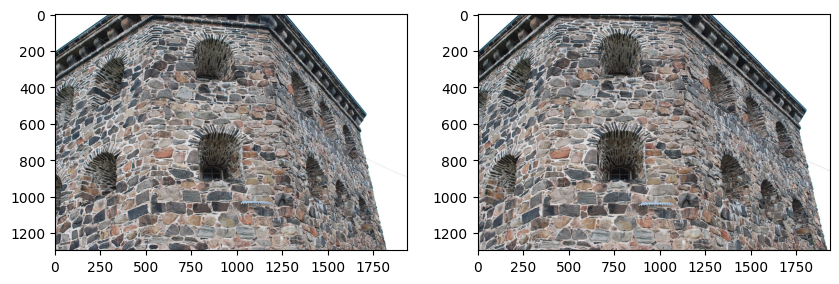

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib
import matplotlib.image as image
import matplotlib.pyplot as plt
from skimage.feature import (corner_harris, corner_peaks, plot_matched_features, BRIEF, match_descriptors)
from skimage.transform import warp, ProjectiveTransform, EssentialMatrixTransform, FundamentalMatrixTransform
from skimage.color import rgb2gray
from skimage.measure import ransac

# Indicate (E) inlier matches in image 1 and image 2
# loading two images (two camera views) and the corresponding matrix K (intrinsic parameters)
imL = image.imread("images/kronan1.jpg")
imR = image.imread("images/kronan2.jpg")
imLgray = rgb2gray(imL)
imRgray = rgb2gray(imR)

K = 1.0e+03 * np.array([[2.3940, -0.0000,    0.9324],
                        [     0,  2.3981,    0.6283],
                        [     0,       0,    0.0010]])


plt.figure(0,figsize = (10, 4))
ax81 = plt.subplot(121)
plt.imshow(imL)
ax82 = plt.subplot(122)
plt.imshow(imR)
plt.show()

### Step 1: Feature detection (e.g. corners) 

the number of features in images 1 and 2 are  1578 and  1660


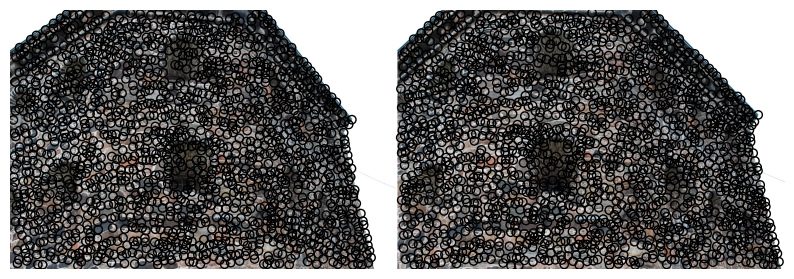

In [2]:
# NOTE: corner_peaks and many other feature extraction functions return point coordinates as (y,x), that is (rows,cols)
keypointsL = corner_peaks(corner_harris(imLgray), threshold_rel=0.001, min_distance=15)
keypointsR = corner_peaks(corner_harris(imRgray), threshold_rel=0.001, min_distance=15)


print ('the number of features in images 1 and 2 are {:5d} and {:5d}'.format(keypointsL.shape[0],keypointsR.shape[0]))

fig = plt.figure(1,figsize = (10, 4))
axA = plt.subplot(111)
plt.gray()
matchesLR = np.empty((0,2))
plot_matched_features(imL, imR, keypoints0=keypointsL, keypoints1=keypointsR, matches=matchesLR, ax=axA)
axA.axis('off')

plt.show()

### Step 2: Feature matching (e.g. BRIEF descriptor, a variant of SURF, SIFT, etc)

the number of matches is 965


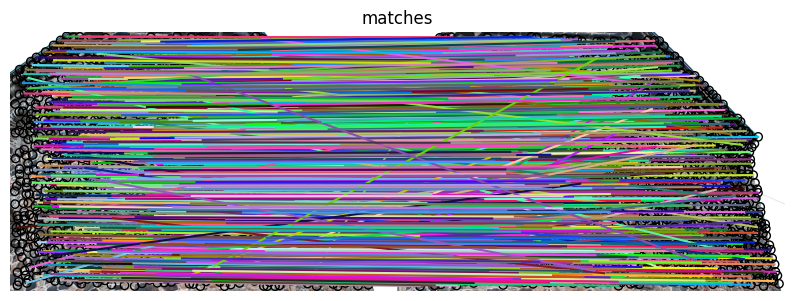

In [3]:
extractor = BRIEF()

extractor.extract(imLgray, keypointsL)
keypointsL = keypointsL[extractor.mask]         
descriptorsL = extractor.descriptors

extractor.extract(imRgray, keypointsR)
keypointsR = keypointsR[extractor.mask]
descriptorsR = extractor.descriptors

matchesLR = match_descriptors(descriptorsL, descriptorsR, cross_check=True)

print ('the number of matches is {:2d}'.format(matchesLR.shape[0]))

fig = plt.figure(2,figsize = (10, 4))
axA = plt.subplot(111)
axA.set_title("matches")
plt.gray()
plot_matched_features(imL, imR, keypoints0=keypointsL, keypoints1=keypointsR, matches=matchesLR, ax=axA)
axA.axis('off')

plt.show()

### Step 3: Fundamental Matrix estimation using RANSAC

the number of inliers is 164


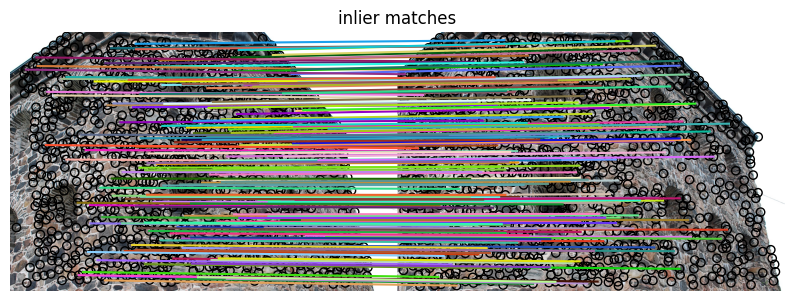

In [4]:
ptsL1 = []
ptsR1 = []
for i in matchesLR:
    ptsL1.append(keypointsL[i[0]])
    ptsR1.append(keypointsR[i[1]])
ptsL1 = np.array(ptsL1)
ptsR1 = np.array(ptsR1)

# swapping columns using advanced indexing https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#advanced-indexing
# This changes point coordinates from (y,x) in ptsL1/ptsR1 to (x,y) in ptsL/ptsR
ptsL = ptsL1[:,[1, 0]]
ptsR = ptsR1[:,[1, 0]]

# robustly estimate fundamental matrix using RANSAC
F_trans, F_inliers = ransac((ptsL, ptsR), FundamentalMatrixTransform, min_samples=8, residual_threshold=0.1, max_trials=1500)
print ('the number of inliers is {:2d}'.format(np.sum(F_inliers)))

ind = np.ogrid[:ptsL.shape[0]]
FmatchesRansac = np.column_stack((ind[F_inliers],ind[F_inliers]))

fig = plt.figure(3,figsize = (10, 4))
axA = plt.subplot(111)
axA.set_title("inlier matches")
plt.gray()
# NOTE: function "plot_matched_features" expects that key-point coordinates are given as (y,x), that is (row, col)
plot_matched_features(imL, imR, keypoints0=ptsL1, keypoints1=ptsR1, matches=FmatchesRansac, ax=axA)
axA.axis('off')
plt.show()

### singular values for F

In [5]:
F = F_trans.params
Uf,Sf,Vf = la.svd(F, full_matrices=False)
print (Sf)

[8.31454122e-02 6.44025266e-05 1.52055166e-19]


### Step 4: Epipolar lines from F

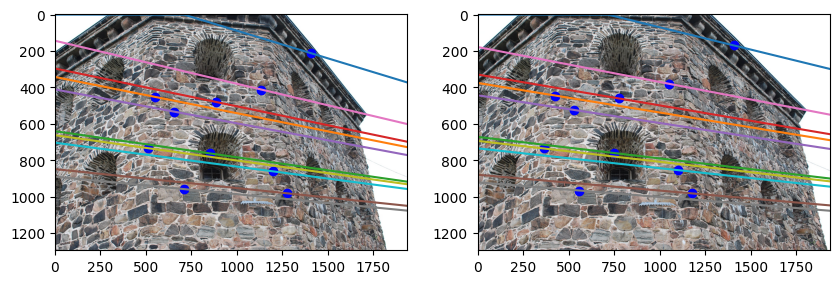

In [6]:
# Randomly select 10 matches (pairs of features in two images) from the set of inliers for F
ind_sample = np.random.choice(ind[F_inliers], 10, replace = False)

# Indicate these matching features in image 1 and image 2
plt.figure(4,figsize = (10, 4))
ax41 = plt.subplot(121)
plt.imshow(imL)
plt.plot(ptsL[ind_sample, 0], ptsL[ind_sample, 1], 'ob')
ax42 = plt.subplot(122)
plt.imshow(imR)
plt.plot(ptsR[ind_sample, 0], ptsR[ind_sample, 1], 'ob')

# generate epipolar line equations in image 2 (homogeneous 3-vectors l2 representing lines l2 x  = 0) 
# a. create an array of points sampled in images 1 and 2  
# b. create an array of homogeneous points sampled in images 1 and 2 
# c. create an array of the corresponding epipolar lines in images 1 and 2 

ptsL_sample = np.array(ptsL[ind_sample])
ptsR_sample = np.array(ptsR[ind_sample])

ptsL_sample = np.hstack((ptsL_sample, np.ones((ptsL_sample.shape[0],1))))
ptsR_sample = np.hstack((ptsR_sample, np.ones((ptsR_sample.shape[0],1))))


epl1 = (F.T @ ptsR_sample.T).T 
epl2 = (F @ ptsL_sample.T).T


# for each feature (in both images) draw a correspoindiung epipolar line in the other image
# see Assignment 1 (line fitting part 1) for inspiration on how to visualize lines
# use ax41.plot and ax42.plot 
x = np.arange(0, 1936)

m1 = -epl1[:, 0] / epl1[:, 1]
b1 = -epl1[:, 2] / epl1[:, 1]
y1 = np.clip(np.outer(m1, x) + b1[:, np.newaxis], 0, 1296)

m2 = -epl2[:, 0] / epl2[:, 1]
b2 = -epl2[:, 2] / epl2[:, 1]
y2 = np.clip(np.outer(m2, x) + b2[:, np.newaxis], 0, 1296)


for i in range(len(ind_sample)):
    ax41.plot(x, y1[i])
    ax42.plot(x, y2[i])
    

plt.show()

### Step 5: Camera Normalization and Essential Matrix estimation using RANSAC

the number of inliers is 661


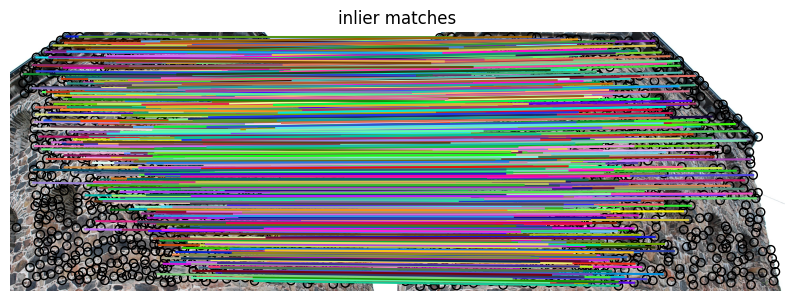

In [7]:
# normalization of points in two images using K (intrinsic parameters) e.g. in the following three steps
# a. convert original points to homogeneous 3-vectors (append "1" as a 3rd coordinate using np.append function)
# b. transform the point by applying the inverse of K

# c. convert homogeneous 3-vectors to 2-vectors (in R2)
n_ptsL = np.hstack((ptsL, np.ones((ptsL.shape[0],1))))
n_ptsR = np.hstack((ptsR, np.ones((ptsR.shape[0],1))))

n_ptsL = (la.inv(K) @ n_ptsL.T).T
n_ptsR = (la.inv(K) @ n_ptsR.T).T

n_ptsL = np.column_stack((n_ptsL[:,0] / n_ptsL[:,2], n_ptsL[:,1] / n_ptsL[:,2]))
n_ptsR = np.column_stack((n_ptsR[:,0] / n_ptsR[:,2], n_ptsR[:,1] / n_ptsR[:,2]))

# robustly estimate essential matrix using normalized points and RANSAC
E_trans, E_inliers = ransac((n_ptsL, n_ptsR), EssentialMatrixTransform, min_samples=8, residual_threshold=0.0005, max_trials=5000)
num_inliers = np.sum(E_inliers)
print ('the number of inliers is {:2d}'.format(num_inliers))

ind = np.ogrid[:n_ptsL.shape[0]]
EmatchesRansac = np.column_stack((ind[E_inliers],ind[E_inliers]))

fig = plt.figure(5,figsize = (10, 4))
axA = plt.subplot(111)
axA.set_title("inlier matches")
plt.gray()
# NOTE: function "plot_matched_features" expects that key-point coordinates are given as (y,x), that is (row, col)
plot_matched_features(imL, imR, keypoints0=ptsL1, keypoints1=ptsR1, matches=EmatchesRansac, ax=axA)
axA.axis('off')
plt.show()

### singular values for E
#### Hint: function $svd$ from $linalg$ returns transpose $V^T$, not $V$.  

In [8]:
E = E_trans.params
Ue,Se,Ve = la.svd(E)
print (Se)

[5.15321371e+00 5.03186110e+00 3.67237019e-16]


### Step 6: Epipolar Lines from E 

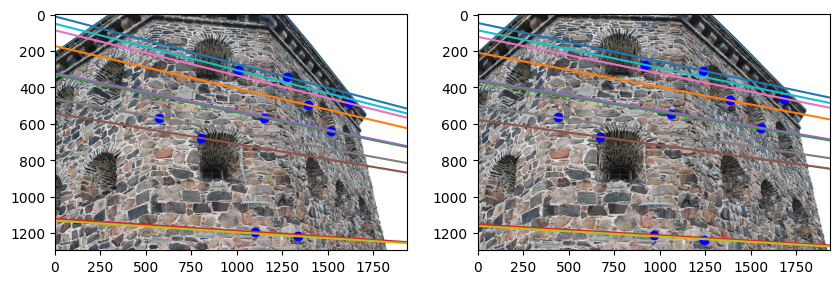

In [9]:
# Randomly select 10 matches (paris of features in two images) from the set of inliers for E
ind_sample = np.random.choice(ind[E_inliers], 10, replace = False)

# Indicate these matching features in image 1 and image 2
plt.figure(6,figsize = (10, 4))
ax61 = plt.subplot(121)
plt.imshow(imL)
plt.plot(ptsL[ind_sample, 0], ptsL[ind_sample, 1], 'ob')
ax62 = plt.subplot(122)
plt.imshow(imR)
plt.plot(ptsR[ind_sample, 0], ptsR[ind_sample, 1], 'ob')

# generate epipolar line equations in image 2 (homoheneous 3-vectors l2 representing lines l2 x  = 0) 
# a. create an array of normalized points sampled in image 1 
# b. create an array of homogeneous normalized points sampled in image 1 
# c. create an array of the corresponding (uncalibrated) epipolar lines in image 2 
n_ptsL_sample = n_ptsL[ind_sample]
n_ptsR_sample = n_ptsR[ind_sample]

n_ptsL_sample = np.hstack((n_ptsL_sample, np.ones((n_ptsL_sample.shape[0],1))))
n_ptsR_sample = np.hstack((n_ptsR_sample, np.ones((n_ptsR_sample.shape[0],1))))

n_epl1 = (la.inv(K.T) @ E.T @ n_ptsR_sample.T).T 
n_epl2 = (la.inv(K.T) @ E @ n_ptsL_sample.T).T

# for each feature (in both images) draw a correspoindiung epipolar line in the other image
# use ax61.plot and ax62.plot 
x = np.arange(0, 1936)

m1 = -n_epl1[:, 0] / n_epl1[:, 1]
b1 = -n_epl1[:, 2] / n_epl1[:, 1]
y1 = np.clip(np.outer(m1, x) + b1[:, np.newaxis], 0, 1296)

m2 = -n_epl2[:, 0] / n_epl2[:, 1]
b2 = -n_epl2[:, 2] / n_epl2[:, 1]
y2 = np.clip(np.outer(m2, x) + b2[:, np.newaxis], 0, 1296)


for i in range(len(ind_sample)):
    ax61.plot(x, y1[i])
    ax62.plot(x, y2[i])


plt.show()

### Step 7: Camera rotation and translation (four solutions)

#### Factorize essential matrix $E=[T]_\times R$ where $R$ is rotation and $T$ is a translation. Find solutions $R_1$, $R_2$ and $T_1$, $T_2$. Use camera 1 for world coordinates. Define projection matrix for camera 1 as $P_w = [I|0]$ and compute four projection matrices for the second camera $P_a$, $P_b$, $P_c$, $P_d$.
#### Hint 1: for array multiplication use $dot$ or $matmul$, never $*$. 
#### Hint 2: function  $svd$  from  $linalg$  returns  $V^T$ rather than $V$ (the 2nd orthogonal matrix in svd decomposition $E = USV^T$).
#### Warning: remember that python uses 0 as a starting index for the rows or columns in arrays. For example, $A[0]$ denotes the first row of matrix $A$, while $P_w[2]$ stands for the 3rd row of the corresponding projection matrix and $E[:,[1]]$ is the second column of the essential matrix. 


In [10]:
U, D, Vt = la.svd(E)

if la.det(U @ Vt) < 0:
    Vt[2] = -Vt[2]

W = np.array(
    [[0,-1,0], 
     [1,0,0], 
     [0,0,1]]
    )

R1 = U @ W @ Vt
R2 = U @ W.T @ Vt
T1 = U[:,2]   
T2 = - T1

# first camera matrix
Pw = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0]
])

# four possible matrices for the second camera
Pa = np.column_stack((R1, T1))
Pb = np.column_stack((R1, T2))
Pc = np.column_stack((R2, T1))
Pd = np.column_stack((R2, T2))

### Summary of Structure-from-Motion (the remaining steps 8-11): 
#### In these 3D reconstruction steps you should use the world coordinate system consistent with the projection matrices estimated in step 7. In all steps you should obtain solutions for all four distinct cases of the second camera: $P_a$, $P_b$, $P_c$, $P_d$. First, step 8 is to Implement least squares (you can use $svd$ or $inv$ functions) for "triangulating" 3D points corresponding to pairs of matched features that are inliers for estimated $E$ (i.e. consistent with the epipolar geometry). Make sure to use normalized coordinates for image points. Then (step 9) you will compute camera positioning (optical centers and calibrated image centers as 3D points) in the world coordinate system. This is used in data visualsation step 10 (fully implemented). That step visulaizes in 3D both camera positions (red - optical centers, green - image centers) and triangulated points (blue) for four possible cases of the second camera. You should identify one case when solution has 3D points in front of both cameras. In the last step 11 you will project 3D points onto each camera, convert to uncalibrated coordinates, and display these projected points (use red) together with the original features (use blue). Observe if the red and blue points are close in each image.
### Step 8: Triangulation (four solutions)

In [11]:
# Select normalized coordinates for matched features that are inliers for essential matrix E. 
# Form matrix A in equation AX=0 where X represent 4 vectors (homogeneous representation of 3D point).
# Use your solution for Problem 6.
# Each camera (projection matrix P) will define its own A  

# HINT: to keep it simple, first solve the problem for one match.

n_ptsL_inliers = n_ptsL[EmatchesRansac[:,0]]
n_ptsR_inliers = n_ptsR[EmatchesRansac[:,1]]

def compute_A(P, a, b):
    return np.stack([
        a[:,1, np.newaxis] * Pw[2] - Pw[1],  
        a[:,0, np.newaxis] * Pw[2] - Pw[0],  
        b[:,1, np.newaxis] * P[2] - P[1],  
        b[:,0, np.newaxis] * P[2] - P[0]   
    ], axis=1) 


Aa = compute_A(Pa, n_ptsL_inliers, n_ptsR_inliers)    
Ab = compute_A(Pb, n_ptsL_inliers, n_ptsR_inliers)
Ac = compute_A(Pc, n_ptsL_inliers, n_ptsR_inliers)
Ad = compute_A(Pd, n_ptsL_inliers, n_ptsR_inliers)    


#### Solution using least squares: assume homogeneous 3D point $X=[X_1,X_2,X_3,1]$. Then, $AX=0$ gives 4 equations for 3 unknowns. Use approach 1 (inhomogeneous least squares) discussed for homography estimation (Topic 6).

In [12]:
# least squares for solving linear system A_{0:2} X_{0:2} = - A_3 
Aa_02 = Aa[:, :, :-1]       # the first 3 columns of 4x4 matrix A
Aa_3  = Aa[:, :, -1]       # the last column on 4x4 matrix A
Ab_02 = Ab[:, :, :-1]       
Ab_3  = Ab[:, :, -1]
Ac_02 = Ac[:, :, :-1]       
Ac_3  = Ac[:, :, -1] 
Ad_02 = Ad[:, :, :-1]       
Ad_3  = Ad[:, :, -1] 

# Nx3 matrices: N rows with 3D point coordinates for N reconstructed points (N=num_inliers)
def compute_X(A_02, A_3):
    return la.inv(A_02.T @ A_02) @ A_02.T @ (-A_3)

# Use np.vectorize to apply the function element-wise
vectorized_compute_X = np.vectorize(compute_X, signature='(n,m),(n)->(m)')

Xa = vectorized_compute_X(Aa_02, Aa_3)
Xb = vectorized_compute_X(Ab_02, Ab_3)
Xc = vectorized_compute_X(Ac_02, Ac_3)
Xd = vectorized_compute_X(Ad_02, Ad_3)


### Step 9: Camera positioning in 3D  (four solutions)
#### In this step you will compute location of each cameras' optical center and its (calibrated) image center as points in 3D (world coordinate system). The next step 10 visulaizes the computed cameras' optical centers in red and image centers in green.

In [13]:
# camera's optical centers (for pair of cameras) as points in 3D world coordinate system
# 2x3 matrices: two rows with 3D point coordinates for the first and second camera
Ca = np.vstack((np.zeros(3), (-la.inv(R1) @ T1).reshape((3))))
Cb = np.vstack((np.zeros(3), (-la.inv(R1) @ T2).reshape((3))))
Cc = np.vstack((np.zeros(3), (-la.inv(R2) @ T1).reshape((3))))
Cd = np.vstack((np.zeros(3), (-la.inv(R2) @ T2).reshape((3))))

# calibrated/normalized image centers (for pair of cameras) as points in 3D world coordinate system
# 2x3 matrices: two rows with 3D po### Step 9: Cameras positions/orientations in 3D  (four solutions)int coordinates for the first and second camera
Qa = np.vstack((np.array([0,0,1]), (-la.inv(R1) @ (np.array([0,0,1]) - T1)).reshape((3))))
Qb = np.vstack((np.array([0,0,1]), (-la.inv(R1) @ (np.array([0,0,1]) - T2)).reshape((3))))
Qc = np.vstack((np.array([0,0,1]), (-la.inv(R2) @ (np.array([0,0,1]) - T1)).reshape((3))))
Qd = np.vstack((np.array([0,0,1]), (-la.inv(R2) @ (np.array([0,0,1]) - T2)).reshape((3))))

print (Cc)
print (Qc)

[[ 0.          0.          0.        ]
 [-0.881628   -0.16126192 -0.4435388 ]]
[[ 0.          0.          1.        ]
 [ 0.98227777  0.17006309 -0.55134419]]


### Step 10 $\text{(fully implemented)}$: 3D visualization of cameras and triangulated points (four solutions)

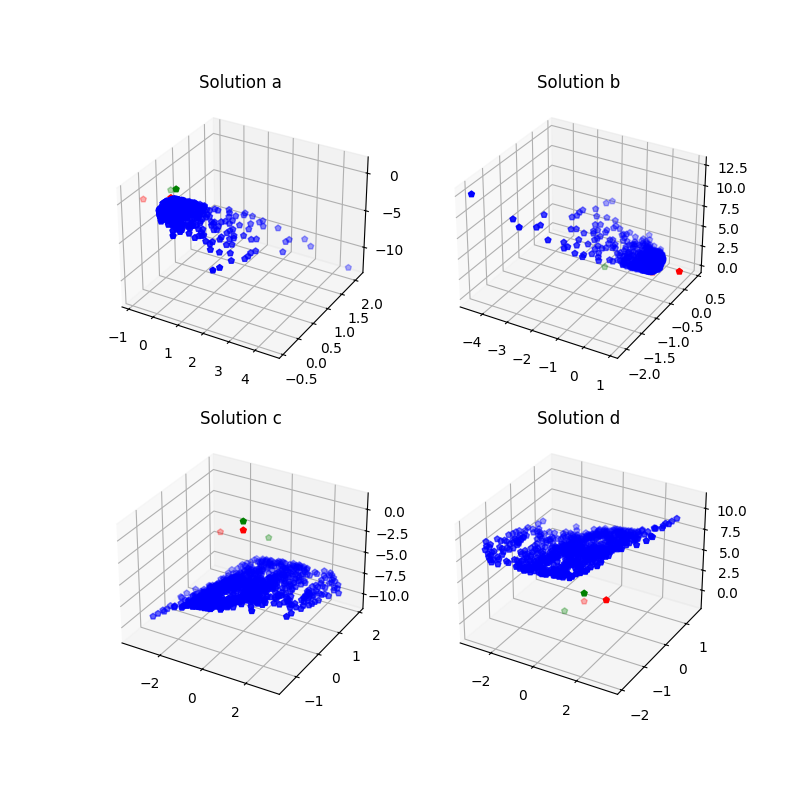

In [14]:
# NOTE: WIDGETS MAGIC ALLOWS INTERACTIVE VISUALIZATION OF RECONSTRUCTED 3D POINT CLOUD
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(10,figsize = (8, 8))

ax10_1 = plt.subplot(221, projection='3d')
plt.title('Solution a')
ax10_1.scatter(Xa[:,0],Xa[:,1],Xa[:,2], c='b', marker='p')
ax10_1.scatter(Ca[:,0],Ca[:,1],Ca[:,2], c='r', marker='p')
ax10_1.scatter(Qa[:,0],Qa[:,1],Qa[:,2], c='g', marker='p')

ax10_2 = plt.subplot(222, projection='3d')
plt.title('Solution b')
ax10_2.scatter(Xb[:,0],Xb[:,1],Xb[:,2], c='b', marker='p')
ax10_2.scatter(Cb[:,0],Cb[:,1],Cb[:,2], c='r', marker='p')
ax10_2.scatter(Qb[:,0],Qb[:,1],Qb[:,2], c='g', marker='p')

ax10_3 = plt.subplot(223, projection='3d')
plt.title('Solution c')
ax10_3.scatter(Xc[:,0],Xc[:,1],Xc[:,2], c='b', marker='p')
ax10_3.scatter(Cc[:,0],Cc[:,1],Cc[:,2], c='r', marker='p')
ax10_3.scatter(Qc[:,0],Qc[:,1],Qc[:,2], c='g', marker='p')

ax10_4 = plt.subplot(224, projection='3d')
plt.title('Solution d')
ax10_4.scatter(Xd[:,0],Xd[:,1],Xd[:,2], c='b', marker='p')
ax10_4.scatter(Cd[:,0],Cd[:,1],Cd[:,2], c='r', marker='p')
ax10_4.scatter(Qd[:,0],Qd[:,1],Qd[:,2], c='g', marker='p')

plt.show()

### Step 11: Reprojection errors

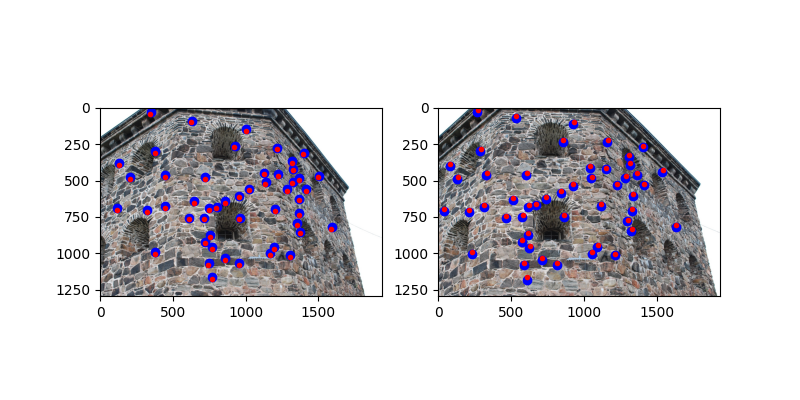

In [15]:
# Randomly select N=50 matches (pairs of features in two images) from the set of inliers for E
N = 50
ind_sample2 = np.random.choice(num_inliers, N, replace = False)

# Indicate (E) inlier matches in image 1 and image 2
plt.figure(11,figsize = (8, 4))
ax11_1 = plt.subplot(121)
plt.imshow(imL)
plt.plot(ptsL[ind[E_inliers][ind_sample2], 0], ptsL[ind[E_inliers][ind_sample2], 1], 'ob')
ax11_2 = plt.subplot(122)
plt.imshow(imR)
plt.plot(ptsR[ind[E_inliers][ind_sample2], 0], ptsR[ind[E_inliers][ind_sample2], 1], 'ob')

# project reconstructed 3D points onto both images and display them in red color
# a. convert correct points (Xa, Xb, Xc, or Xd) to homogeneous 4 vectors
# b. project homogeneous 3D points (onto uncalibrated cameras) using correct Projection matrices (KPw and, e.g. KPa)
# c. convert to regular (inhomogeneous) point
ptsL_proj = np.zeros((N,2))
ptsR_proj = np.zeros((N,2))

vec4_a = np.hstack((Xa, np.ones((Xa.shape[0], 1))))[ind_sample2]
vec4_b = np.hstack((Xb, np.ones((Xb.shape[0], 1))))[ind_sample2]
vec4_c = np.hstack((Xc, np.ones((Xc.shape[0], 1))))[ind_sample2]
vec4_d = np.hstack((Xd, np.ones((Xd.shape[0], 1))))[ind_sample2]

vec4L= (K @ Pw @ vec4_b.T).T
vec4R = (K @ Pb @ vec4_b.T).T

ptsL_proj = vec4L[:, [0,1]] / vec4L[:,[2]]
ptsR_proj = vec4R[:, [0,1]] / vec4R[:,[2]]

ax11_1.plot(ptsL_proj[:,0], ptsL_proj[:,1], '.r')
ax11_2.plot(ptsR_proj[:,0], ptsR_proj[:,1], '.r')

plt.show()

## Question: how different are projected points for $SfM$ solutions a, b, c, and d? Explain. 

Answer:
The projected points are fairly similar between all the solutions. Using the homogeneous least squares method, we minimize the errors so it is to be expected that the points are projected close to the true positions. Thus, the projections are close to each other. However, only one solution fits closely to the true camera positioning. Its orientation indicates that the optical center faces the image center in the direction of the points for both cameras. This is the correct positioning for the cameras.